# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#THREE OBSERVATIONS:
#1. Max Temperature is correlated to proximity to the equator. 
#2. Humidity across the globe is greater than 50% for most of the areas defined as cities. 
#   This is likely correlated to the fact that environment invites human civilization.
#3. Cloudiness is not a measured quantity as the value is grouped to the 10's and 5's of percent. 
#    Cloudiness also does not correlate to latitude. 
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}
current_weather_list = []
city =[]
date = time.process_time
print('Begining Data Retrival')
for x in range(len(cities)):
    try:
        current_weather = owm.get_current(cities[x], **settings)
        print(f"Processing Record {x} city: {cities[x]}")
        current_weather_list.append(current_weather)
        city.append(cities[x])
        
    except:
        print("City not found. Skipping...")     
    time.sleep(.02) 
print('Data Retrival Complete') 

Begining Data Retrival
City not found. Skipping...
Processing Record 1 city: poum
Processing Record 2 city: guadalupe y calvo
Processing Record 3 city: pundaguitan
Processing Record 4 city: umm bab
Processing Record 5 city: victoria
Processing Record 6 city: carutapera
Processing Record 7 city: lebu
Processing Record 8 city: fairmont
City not found. Skipping...
Processing Record 10 city: huarmey
Processing Record 11 city: norman wells
Processing Record 12 city: maragogi
Processing Record 13 city: bluff
Processing Record 14 city: hobart
Processing Record 15 city: mar del plata
Processing Record 16 city: ushuaia
City not found. Skipping...
Processing Record 18 city: lavrentiya
Processing Record 19 city: zhangjiakou
Processing Record 20 city: bellevue
Processing Record 21 city: new norfolk
Processing Record 22 city: chuy
Processing Record 23 city: hambantota
Processing Record 24 city: tasiilaq
Processing Record 25 city: taoudenni
Processing Record 26 city: bredasdorp
Processing Record 27 

Processing Record 230 city: pak phanang
Processing Record 231 city: zhicheng
Processing Record 232 city: johannesburg
Processing Record 233 city: lakes entrance
City not found. Skipping...
Processing Record 235 city: sisimiut
Processing Record 236 city: mahebourg
Processing Record 237 city: sangar
Processing Record 238 city: henties bay
Processing Record 239 city: padang
City not found. Skipping...
Processing Record 241 city: isangel
Processing Record 242 city: blagoyevo
Processing Record 243 city: coari
Processing Record 244 city: faanui
Processing Record 245 city: talaya
Processing Record 246 city: tekirdag
Processing Record 247 city: zarnesti
Processing Record 248 city: vao
Processing Record 249 city: nadym
Processing Record 250 city: kamakhyanagar
Processing Record 251 city: los llanos de aridane
Processing Record 252 city: guerrero negro
Processing Record 253 city: moletai
Processing Record 254 city: vostok
Processing Record 255 city: sturgis
Processing Record 256 city: montrose
P

Processing Record 454 city: itarema
Processing Record 455 city: manacor
Processing Record 456 city: pisco
Processing Record 457 city: cascais
Processing Record 458 city: brae
Processing Record 459 city: mozhga
Processing Record 460 city: launceston
Processing Record 461 city: birao
Processing Record 462 city: boyabat
Processing Record 463 city: kargil
Processing Record 464 city: methven
Processing Record 465 city: toora-khem
Processing Record 466 city: boende
Processing Record 467 city: north platte
Processing Record 468 city: torbay
Processing Record 469 city: tiznit
Processing Record 470 city: kandi
Processing Record 471 city: yulara
Processing Record 472 city: balabac
Processing Record 473 city: jiujiang
Processing Record 474 city: valle de allende
Processing Record 475 city: batagay-alyta
Processing Record 476 city: matara
Processing Record 477 city: batagay
Processing Record 478 city: henderson
Processing Record 479 city: kloulklubed
Processing Record 480 city: amalapuram
Processi

In [4]:
summary = ["name","coord.lat","coord.lon","main.temp", "wind.speed","main.humidity", "clouds.all","sys.country","dt","main.temp_max"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in current_weather_list]

weather_data = pd.DataFrame(data, index=city)
column_names = ["City","Latitude","Longitude","Temperature","Wind Speed (mph)" , "Humidity (%)","Cloudiness (%)","Country","Date","Max Temperature (F)"]
weather_data = pd.DataFrame(data, columns=column_names)

In [5]:
weather_data.to_csv("Cities_Weather.csv")
weather_data.count()

City                   546
Latitude               546
Longitude              546
Temperature            546
Wind Speed (mph)       546
Humidity (%)           546
Cloudiness (%)         546
Country                546
Date                   546
Max Temperature (F)    546
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.head()

,City,Latitude,Longitude,Temperature,Wind Speed (mph),Humidity (%),Cloudiness (%),Country,Date,Max Temperature (F)
0,Poum,41.28,20.71,10.40,6.93,85,40,MK,1547350200,10.40
1,Guadalupe y Calvo,26.09,-106.96,34.74,1.81,69,0,MX,1547352054,34.74
2,Pundaguitan,6.37,126.17,80.73,5.10,100,92,PH,1547352054,80.73
3,Umm Bab,25.21,50.81,54.50,6.93,87,20,QA,1547348160,54.50
4,Victoria,5.28,115.24,84.99,4.70,74,75,BN,1547348400,86.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

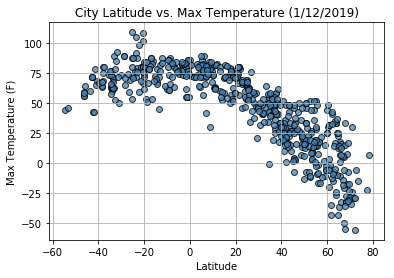

In [13]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,9]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
ttl = f"City {l_x.name} vs. {t_y.name[:-3]}"
plt.title(ttl + "(1/12/2019)")
plt.savefig(ttl+".png")
plt.show()

#### Latitude vs. Humidity Plot

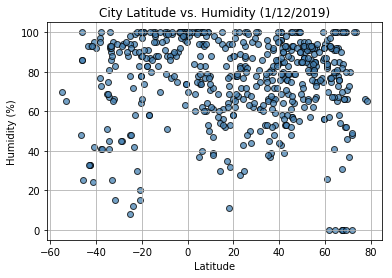

In [14]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,5]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
ttl = f"City {l_x.name} vs. {t_y.name[:-3]}"
plt.title(ttl + "(1/12/2019)")
plt.savefig(ttl+".png")
plt.show()

#### Latitude vs. Cloudiness Plot

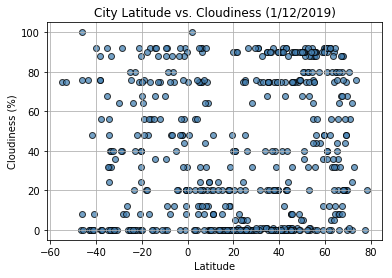

In [15]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,6]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
ttl = f"City {l_x.name} vs. {t_y.name[:-3]}"
plt.title(ttl + "(1/12/2019)")
plt.savefig(ttl+".png")
plt.show()

#### Latitude vs. Wind Speed Plot

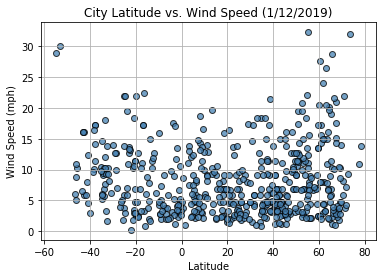

In [16]:
l_x = weather_data.iloc[:,1]
t_y = weather_data.iloc[:,4]
plt.scatter(l_x, t_y, marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)
plt.xlabel(l_x.name)
plt.grid(which='major',axis='both')
plt.ylabel(t_y.name)
ttl = f"City {l_x.name} vs. {t_y.name[:-5]}"
plt.title(ttl + "(1/12/2019)")
plt.savefig(ttl+".png")
plt.show()